# Double 7's Intra (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY makes an intraday X-day low, buy.
    3. If the SPY makes an intraday X-day high, sell your long position.
    
    (optimize the number of days)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()
use_adj = False

Define high low trade periods

In [4]:
periods = range(3, 16)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, use_adj, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,4.96,4.61,6.80,6.39,7.33,6.92,6.14,6.15,6.16,6.06,6.09,5.64,5.63
max_closed_out_drawdown,-35.27,-34.07,-34.29,-33.83,-33.71,-33.77,-33.66,-33.20,-33.02,-30.88,-30.94,-30.97,-30.91
drawdown_annualized_return,-7.11,-7.39,-5.04,-5.30,-4.60,-4.88,-5.48,-5.40,-5.36,-5.10,-5.08,-5.49,-5.49
drawdown_recovery,-2.15,-0.16,-0.21,-0.21,-0.09,-0.09,-0.09,-0.13,-0.08,-0.13,-0.13,-0.13,-0.13
best_month,11.44,10.86,11.33,14.84,14.90,15.19,17.74,17.83,17.78,18.01,18.05,18.08,18.03
worst_month,-29.78,-31.20,-31.26,-31.30,-31.28,-31.34,-31.23,-31.34,-31.28,-30.73,-30.78,-30.82,-30.76
sharpe_ratio,0.46,0.43,0.60,0.57,0.64,0.61,0.54,0.54,0.54,0.53,0.54,0.51,0.51
sortino_ratio,0.41,0.38,0.52,0.49,0.54,0.50,0.45,0.45,0.45,0.44,0.43,0.40,0.40
monthly_std,2.91,2.81,2.79,2.74,2.72,2.72,2.80,2.84,2.84,2.83,2.77,2.70,2.71
pct_time_in_market,47.77,46.04,44.68,43.64,42.89,42.38,41.96,41.51,41.01,40.47,38.73,37.60,36.54


Bar graphs

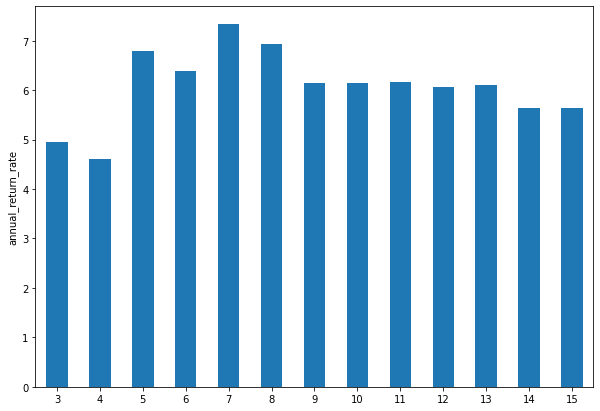

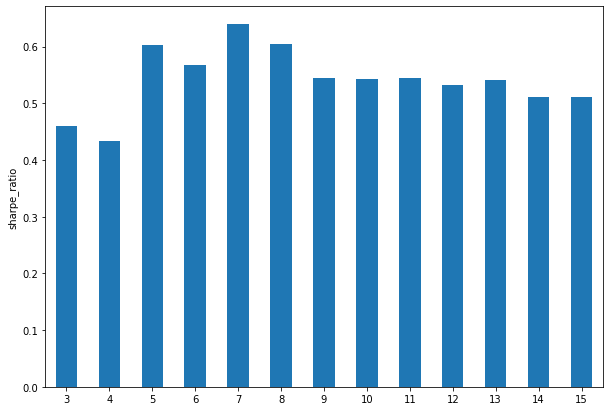

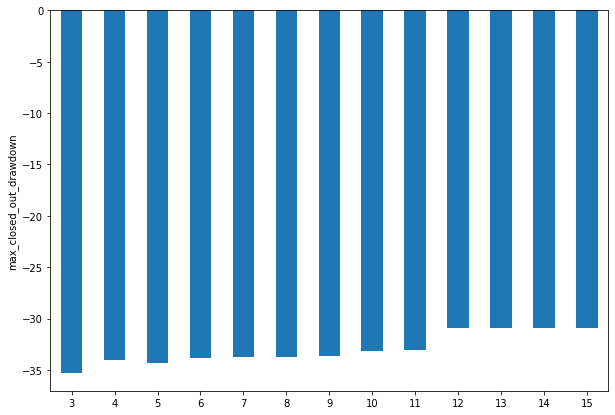

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end, s._use_adj)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-04-23 00:00:00 SELL 215 SPY @ 279.08


Equity curve

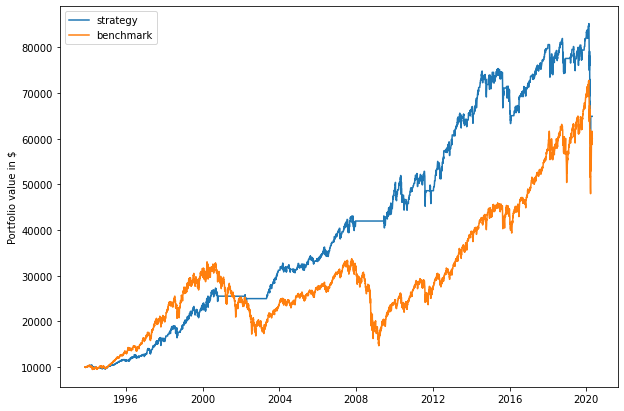

In [9]:
pf.plot_equity_curve(strategies['7'].dbal, benchmark=benchmark.dbal)